In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt

plt.style.use('ggplot')
# Set the random seed
np.random.seed(1)

In [2]:
# load imdb data
(X_train, y_train), (X_test, y_test) = imdb.load_data()

In [3]:
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)
print(X.shape, y.shape)

(50000,) (50000,)


Classes [0 1]
Number of words 88585
Mean 234.75892 words 172.91149458735703


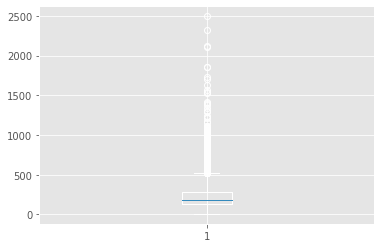

In [4]:
#EDA

print("Classes", np.unique(y))
print("Number of words", len(np.unique(np.hstack(X))))
result = [len(x) for x in X]
print(f"Mean {np.mean(result)} words {np.std(result)}")
plt.boxplot(result)
plt.show()

In [5]:
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [6]:
# padding/truncate the sewntences
max_words = 500
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_words)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_words)
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(5000, 32, input_length=max_words),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 16000)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               4096256   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 4,256,513
Trainable params: 4,256,513
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=128, verbose=2)

Epoch 1/10
196/196 - 6s - loss: 0.4418 - accuracy: 0.7698 - val_loss: 0.2889 - val_accuracy: 0.8784
Epoch 2/10
196/196 - 1s - loss: 0.1599 - accuracy: 0.9399 - val_loss: 0.3378 - val_accuracy: 0.8620
Epoch 3/10
196/196 - 1s - loss: 0.0448 - accuracy: 0.9887 - val_loss: 0.4163 - val_accuracy: 0.8636
Epoch 4/10
196/196 - 1s - loss: 0.0084 - accuracy: 0.9987 - val_loss: 0.5150 - val_accuracy: 0.8624
Epoch 5/10
196/196 - 1s - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.5777 - val_accuracy: 0.8646
Epoch 6/10
196/196 - 1s - loss: 5.9657e-04 - accuracy: 1.0000 - val_loss: 0.6136 - val_accuracy: 0.8643
Epoch 7/10
196/196 - 1s - loss: 3.2922e-04 - accuracy: 1.0000 - val_loss: 0.6394 - val_accuracy: 0.8648
Epoch 8/10
196/196 - 1s - loss: 2.2150e-04 - accuracy: 1.0000 - val_loss: 0.6615 - val_accuracy: 0.8650
Epoch 9/10
196/196 - 1s - loss: 1.5874e-04 - accuracy: 1.0000 - val_loss: 0.6796 - val_accuracy: 0.8658
Epoch 10/10
196/196 - 1s - loss: 1.2045e-04 - accuracy: 1.0000 - val_loss: 0.6973 - 

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
# fix random seed for reproducibility
# numpy.random.seed(1)
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

# create the model
embedding_vector_length = 128
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, 
                    input_length=max_words))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])
print(model.summary())

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, 
          batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 128)          640000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               91600     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 731,701
Trainable params: 731,701
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
391/391 [==============================] - 15s 36ms/step - loss: 0.4403 - accuracy: 0.7853 - val_loss: 0.3151 - val_accuracy: 0.8670
Epoch 2/10
391/391 [==============================] - 14s 35ms/step - loss: 0.3390 - accuracy: 0.8538 - val_loss: 0.3350 - val_accuracy: 0.8697
Epoch 3/10
391/391 [==============================] - 14s 35ms/step - loss: 0.2408 - 